# Computer vision data

In [ ]:
%matplotlib inline
from fastai.gen_doc.nbdoc import *
from fastai import * 
from fastai.vision import * 

This module contains the classes that define datasets handling [`Image`](/vision.image.html#Image) objects and their tranformations. As usual, we'll start with a quick overview, before we get in to the detailed API docs.

## Quickly get your data ready for training

To get you started as easily as possible, the fastai provides two helper functions to create a [`DataBunch`](/basic_data.html#DataBunch) object that you can directly use for training a classifier. To demonstrate them you'll first need to download and untar the file by executing the following cell. This will create a data folder containing an MNIST subset in `data/mnist_sample`.

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/.fastai/data/mnist_sample')

There are a number of ways to create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch). One common approach is to use *Imagenet-style folders* (see a ways down the page below for details) with [`ImageDataBunch.from_folder`](/vision.data.html#ImageDataBunch.from_folder):

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

Here the datasets will be automatically created in the structure of *Imagenet-style folders*. The parameters specified:
- the transforms to apply to the images in `ds_tfms` (here with `do_flip`=False because we don't want to flip numbers),
- the target `size` of our pictures (here 24).

As with all [`DataBunch`](/basic_data.html#DataBunch) usage,  a `train_dl` and a `valid_dl` are created that are of the type PyTorch [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). 

If you want to have a look at a few images inside a batch, you can use [`ImageDataBunch.show_batch`](/vision.data.html#ImageDataBunch.show_batch). The `rows` argument is the number of rows and columns to display.

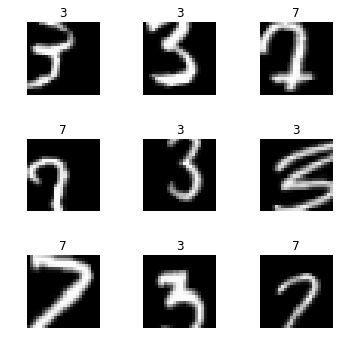

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

The second way to define the data for a classifier requires a structure like this:
```
path\
  train\
  test\
  labels.csv
```
where the labels.csv file defines the label(s) of each image in the training set. This is the format you will need to use when each image can have multiple labels. It also works with single labels:

In [ ]:
pd.read_csv(path/'labels.csv').head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


You can then use [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv):

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

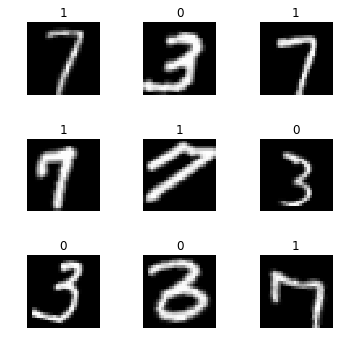

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

An example of multiclassification can be downloaded with the following cell. It's a sample of the [planet dataset](https://www.google.com/search?q=kaggle+planet&rlz=1C1CHBF_enFR786FR786&oq=kaggle+planet&aqs=chrome..69i57j0.1563j0j7&sourceid=chrome&ie=UTF-8).

In [ ]:
planet = untar_data(URLs.PLANET_SAMPLE)

If we open the labels files, we seach that each image has one or more tags, separated by a space.

In [ ]:
df =pd.read_csv(planet/'labels.csv')
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [ ]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', sep=' ',
    ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

The `show_batch`method will then print all the labels that correspond to each image.

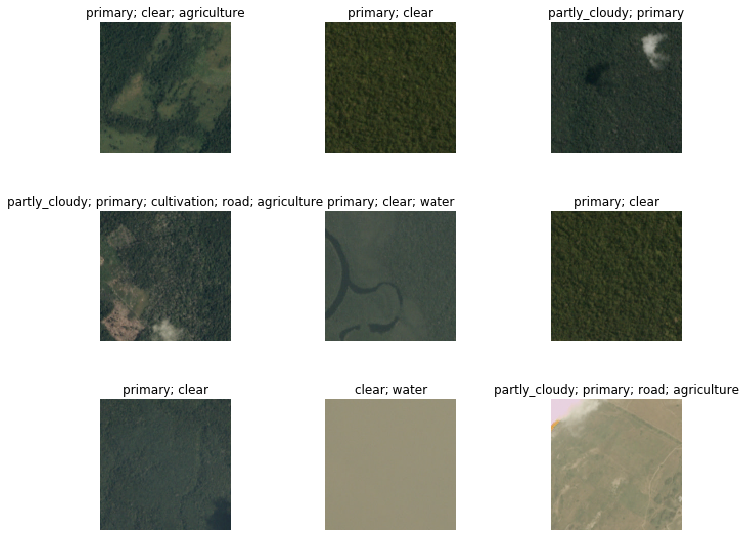

In [ ]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

You can find more ways to build an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) without the factory methods in [`data_block`](/data_block.html#data_block).

In [ ]:
show_doc(ImageDataBunch, doc_string=False)

<h2 id="ImageDataBunch"><code>class</code> <code>ImageDataBunch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L293" class="source_link">[source]</a></h2>

> <code>ImageDataBunch</code>(`train_dl`:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), `valid_dl`:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), `test_dl`:`Optional`\[[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)\]=`None`, `device`:[`device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device)=`None`, `tfms`:`Optional`\[`Collection`\[`Callable`\]\]=`None`, `path`:`PathOrStr`=`'.'`, `collate_fn`:`Callable`=`'data_collate'`) :: [`DataBunch`](/basic_data.html#DataBunch)

### Factory methods

In [ ]:
show_doc(ImageDataBunch.create, arg_comments={
    'bs': 'Desired batchsize for the dataloaders',
    'num_workers': 'The number of process to launch for data collection',
    'ds_tfms': 'Tuple of two lists of transforms (first for training and second for validation and test set)',
    'size': 'Target size for those transforms',
    'tfms': 'List of transforms to be applied at a batch level (like normalization)',
    'device': 'The device on which to put the batches'
})

<h4 id="ImageDataBunch.create"><code>create</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L294" class="source_link">[source]</a></h4>

> <code>create</code>(`train_ds`, `valid_ds`, `test_ds`=`None`, `path`:`PathOrStr`=`'.'`, `bs`:`int`=`64`, `ds_tfms`:`Union`\[[`Transform`](/vision.image.html#Transform), `Collection`\[[`Transform`](/vision.image.html#Transform)\], `NoneType`\]=`None`, `num_workers`:`int`=`4`, `tfms`:`Optional`\[`Collection`\[`Callable`\]\]=`None`, `device`:[`device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device)=`None`, `collate_fn`:`Callable`=`'data_collate'`, `size`:`int`=`None`, `kwargs`) → `ImageDataBunch`

Factory method. `bs` batch size, `ds_tfms` for [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), `tfms` for [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). 

- *bs*: Desired batchsize for the dataloaders
- *num_workers*: The number of process to launch for data collection
- *ds_tfms*: Tuple of two lists of transforms (first for training and second for validation and test set)
- *size*: Target size for those transforms
- *tfms*: List of transforms to be applied at a batch level (like normalization)
- *device*: The device on which to put the batches 

You don't often need to call this directly yourself; instead, you'll normally use one of the convenience wrappers below. However, these wrappers all accept a `kwargs` that is passed to this method, so you can pass any of the above parameters as well.

If you quickly want to get a [`ImageDataBunch`](/vision.data.html#ImageDataBunch) and train a model, you should process your data to have it in one of the formats the following functions handle. 

In [ ]:
show_doc(ImageDataBunch.from_folder)

<h4 id="ImageDataBunch.from_folder"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L311" class="source_link">[source]</a></h4>

> <code>from_folder</code>(`path`:`PathOrStr`, `train`:`PathOrStr`=`'train'`, `valid`:`PathOrStr`=`'valid'`, `test`:`Union`\[`Path`, `str`, `NoneType`\]=`None`, `valid_pct`=`None`, `classes`:`Collection`=`None`, `kwargs`:`Any`) → `ImageDataBunch`

Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).  

"*Imagenet-style*" datasets look something like this (note that the test folder is optional):

```
path\
  train\
    clas1\
    clas2\
    ...
  valid\
    clas1\
    clas2\
    ...
  test\
```

For example:

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

Note that this (and all factory methods in this section) pass any `kwargs` to [`ImageDataBunch.create`](/vision.data.html#ImageDataBunch.create).

In [ ]:
show_doc(ImageDataBunch.from_csv)

<h4 id="ImageDataBunch.from_csv"><code>from_csv</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L337" class="source_link">[source]</a></h4>

> <code>from_csv</code>(`path`:`PathOrStr`, `folder`:`PathOrStr`=`'.'`, `sep`=`None`, `csv_labels`:`PathOrStr`=`'labels.csv'`, `valid_pct`:`float`=`0.2`, `fn_col`:`int`=`0`, `label_col`:`int`=`1`, `test`:`Union`\[`Path`, `str`, `NoneType`\]=`None`, `suffix`:`str`=`None`, `header`:`Union`\[`int`, `str`, `NoneType`\]=`'infer'`, `kwargs`:`Any`) → `ImageDataBunch`

Create from a csv file.  

Create [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `path` by splitting the data in `folder` and labelled in a file `csv_labels` between a training and validation set. Use `valid_pct` to indicate the percentage of the total images for the validation set. An optional `test` folder contains unlabelled data and `suffix` contains an optional suffix to add to the filenames in `csv_labels` (such as '.jpg'). 
For example:

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=24);

In [ ]:
show_doc(ImageDataBunch.from_df)

<h4 id="ImageDataBunch.from_df"><code>from_df</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L325" class="source_link">[source]</a></h4>

> <code>from_df</code>(`path`:`PathOrStr`, `df`:`DataFrame`, `folder`:`PathOrStr`=`'.'`, `sep`=`None`, `valid_pct`:`float`=`0.2`, `fn_col`:`Union`\[`int`, `Collection`\[`int`\], `str`, `StrList`\]=`0`, `label_col`:`Union`\[`int`, `Collection`\[`int`\], `str`, `StrList`\]=`1`, `test`:`Union`\[`Path`, `str`, `NoneType`\]=`None`, `suffix`:`str`=`None`, `kwargs`:`Any`) → `ImageDataBunch`

Create from a DataFrame.  

Same as [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv), but passing in a `DataFrame` instead of a csv file. E.gL

In [ ]:
df = pd.read_csv(path/'labels.csv', header='infer')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)

Different datasets are labeled in many different ways. The following methods can help extract the labels from the dataset in a wide variety of situations. The way they are built in fastai is constructive: there are methods which do a lot for you but apply in specific circumstances and there are methods which do less for you but give you more flexibility.

In this case the hierachy is:

1. [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re): Gets the labels from the filenames using a regular expression
2. [`ImageDataBunch.from_name_func`](/vision.data.html#ImageDataBunch.from_name_func): Gets the labels from the filenames using any function
3. [`ImageDataBunch.from_lists`](/vision.data.html#ImageDataBunch.from_lists): Labels need to be provided as an input in a list

In [ ]:
show_doc(ImageDataBunch.from_name_re)

<h4 id="ImageDataBunch.from_name_re"><code>from_name_re</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L359" class="source_link">[source]</a></h4>

> <code>from_name_re</code>(`path`:`PathOrStr`, `fnames`:`FilePathList`, `pat`:`str`, `valid_pct`:`float`=`0.2`, `test`:`str`=`None`, `kwargs`)

Creates an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `fnames`, calling a regular expression (containing one *re group*) on the file names to get the labels, putting aside `valid_pct` for the validation. In the same way as [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv), an optional `test` folder contains unlabelled data.

Our previously created dataframe contains the labels in the filenames so we can leverage it to test this new method. [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re) needs the exact path of each file so we will append the data path to each filename before creating our [`ImageDataBunch`](/vision.data.html#ImageDataBunch) object.

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)

In [ ]:
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.from_name_func)

<h4 id="ImageDataBunch.from_name_func"><code>from_name_func</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L354" class="source_link">[source]</a></h4>

> <code>from_name_func</code>(`path`:`PathOrStr`, `fnames`:`FilePathList`, `label_func`:`Callable`, `valid_pct`:`float`=`0.2`, `test`:`str`=`None`, `kwargs`)

Works in the same way as [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re), but instead of a regular expression it expects a function that will determine how to extract the labels from the filenames. (Note that `from_name_re` uses this function in its implementation).

To test it we could build a function with our previous regex. Let's try another, similar approach to show that the labels can be obtained in a different way.

In [ ]:
def get_labels(file_path): return '3' if '/3/' in str(file_path) else '7'
data = ImageDataBunch.from_name_func(path, fn_paths, label_func=get_labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.from_lists)

<h4 id="ImageDataBunch.from_lists"><code>from_lists</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L347" class="source_link">[source]</a></h4>

> <code>from_lists</code>(`path`:`PathOrStr`, `fnames`:`FilePathList`, `labels`:`StrList`, `valid_pct`:`float`=`0.2`, `test`:`str`=`None`, `kwargs`)

The most flexible factory function; pass in a list of `labels` that correspond to each of the filenames in `fnames`.

To show an example we have to build the labels list outside our [`ImageDataBunch`](/vision.data.html#ImageDataBunch) object and give it as an argument when we call `from_lists`. Let's use our previously created function to create our labels list.

In [ ]:
labels_ls = list(map(get_labels, fn_paths))
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels_ls, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.single_from_classes)

<h4 id="ImageDataBunch.single_from_classes"><code>single_from_classes</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L395" class="source_link">[source]</a></h4>

> <code>single_from_classes</code>(`path`:`PathOrStr`, `classes`:`StrList`, `kwargs`)

Create an empty [`ImageDataBunch`](/vision.data.html#ImageDataBunch) in `path` with `classes`. Typically used for inference.  

### Methods

In [ ]:
show_doc(ImageDataBunch.show_batch)

<h4 id="ImageDataBunch.show_batch"><code>show_batch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L380" class="source_link">[source]</a></h4>

> <code>show_batch</code>(`rows`:`int`=`None`, `figsize`:`Tuple`\[`int`, `int`\]=`(9, 10)`, `ds_type`:[`DatasetType`](/basic_data.html#DatasetType)=`<DatasetType.Train: 1>`)

Create a `rows` by `rows` grid of images from dataset `ds_type` for a `figsize` figure. This function works for all type of computer vision data (see [`data_block`](/data_block.html#data_block) for more examples).

Once you have your [`ImageDataBunch`](/vision.data.html#ImageDataBunch), you can have a quick look at your data by using this:

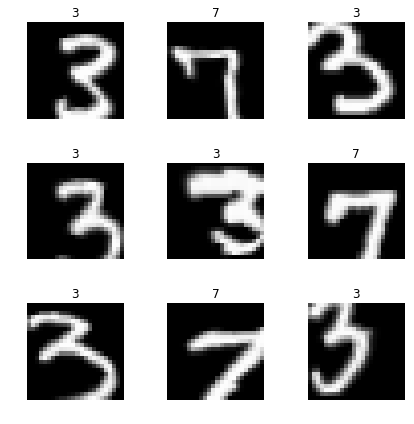

In [ ]:
data.show_batch(rows=3, figsize=(6,6))

In [ ]:
show_doc(ImageDataBunch.labels_to_csv)

<h4 id="ImageDataBunch.labels_to_csv"><code>labels_to_csv</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L383" class="source_link">[source]</a></h4>

> <code>labels_to_csv</code>(`dest`:`str`)

Save file names and labels in `data` as CSV to file name `dest`.  

This is a functional version of [`ImageDataBunch.show_batch`](/vision.data.html#ImageDataBunch.show_batch).

In the next two methods we will use a new dataset, CIFAR. This is because the second method will get the statistics for our dataset and we want to be able to show different statistics per channel. If we were to use MNIST, these statistics would be the same for every channel. White pixels are [255,255,255] and black pixels are [0,0,0] (or in normalized form [1,1,1] and [0,0,0]) so there is no variance between channels.

In [ ]:
path = untar_data(URLs.CIFAR); path

PosixPath('/home/ubuntu/.fastai/data/cifar10')

In [ ]:
show_doc(channel_view)

<h4 id="channel_view"><code>channel_view</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L285" class="source_link">[source]</a></h4>

> <code>channel_view</code>(`x`:`Tensor`) → `Tensor`

Make channel the first axis of `x` and flatten remaining axes  

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=24)

In [ ]:
def channel_view(x:Tensor)->Tensor:
    "Make channel the first axis of `x` and flatten remaining axes"
    return x.transpose(0,1).contiguous().view(x.shape[1],-1) 

This function takes a tensor and flattens all dimensions except the channels, which it keeps as the first axis. This function is used to feed [`ImageDataBunch.batch_stats`](/vision.data.html#ImageDataBunch.batch_stats) so that it can get the pixel statistics of a whole batch.

Let's take as an example the dimensions our MNIST batches: 128, 3, 24, 24.

In [ ]:
t = torch.Tensor(128, 3, 24, 24)

In [ ]:
t.size()

torch.Size([128, 3, 24, 24])

In [ ]:
tensor = channel_view(t)

In [ ]:
tensor.size()

torch.Size([3, 73728])

In [ ]:
show_doc(ImageDataBunch.batch_stats)

<h4 id="ImageDataBunch.batch_stats"><code>batch_stats</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L365" class="source_link">[source]</a></h4>

> <code>batch_stats</code>(`funcs`:`Collection`\[`Callable`\]=`None`) → `Tensor`

Grab a batch of data and call reduction function `func` per channel  

Gets the statistics of each channel of a batch of data. If no functions are specified, default statistics are mean and standard deviation. 

In [ ]:
data.batch_stats()

[tensor([0.5371, 0.5601, 0.5894]), tensor([0.2602, 0.2493, 0.2624])]

In [ ]:
show_doc(ImageDataBunch.normalize)

<h4 id="ImageDataBunch.normalize"><code>normalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L371" class="source_link">[source]</a></h4>

> <code>normalize</code>(`stats`:`Collection`\[`Tensor`\]=`None`)

Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)  

Adds the normalize transform to the set of transforms associated with the data. In the fast.ai library we have `imagenet_stats`, `cifar_stats` and `mnist_stats` so we can add normalization easily with any of these datasets. Let's see an example with our dataset of choice: MNIST.

In [ ]:
data.normalize(cifar_stats)

In [ ]:
data.batch_stats()

[tensor([0.1868, 0.3214, 0.5457]), tensor([1.0533, 1.0260, 1.0055])]

### Other functions

In [ ]:
show_doc(show_image_batch, arg_comments={
    'dl': 'A dataloader from which to show a sample',
    'classes': 'List of classes (for the labels)',
    'rows': 'Will make a square of `rows` by `rows` images',
    'figsize': 'Size of the graph shown'
})

<h4 id="show_image_batch"><code>show_image_batch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L41" class="source_link">[source]</a></h4>

> <code>show_image_batch</code>(`dl`:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), `classes`:`StrList`=`None`, `rows`:`int`=`None`, `figsize`:`Tuple`\[`int`, `int`\]=`(9, 10)`)

Show a few images from a batch. 

- *dl*: A dataloader from which to show a sample
- *classes*: List of classes (for the labels)
- *rows*: Will make a square of `rows` by `rows` images
- *figsize*: Size of the graph shown 

This is a functional version of [`ImageDataBunch.show_batch`](/vision.data.html#ImageDataBunch.show_batch).

## Data normalization

You may also want to normalize your data, which can be done by using the following functions.

In [ ]:
show_doc(normalize)

<h4 id="normalize"><code>normalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L259" class="source_link">[source]</a></h4>

> <code>normalize</code>(`x`:`Tensor`, `mean`:`FloatTensor`, `std`:`FloatTensor`) → `Tensor`

Normalize `x` with `mean` and `std`.  

In [ ]:
show_doc(denormalize)

<h4 id="denormalize"><code>denormalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L263" class="source_link">[source]</a></h4>

> <code>denormalize</code>(`x`:`Tensor`, `mean`:`FloatTensor`, `std`:`FloatTensor`) → `Tensor`

Denormalize `x` with `mean` and `std`.  

In [ ]:
show_doc(normalize_funcs, doc_string=False)

<h4 id="normalize_funcs"><code>normalize_funcs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L275" class="source_link">[source]</a></h4>

> <code>normalize_funcs</code>(`mean`:`FloatTensor`, `std`:`FloatTensor`) → `Tuple`\[`Callable`, `Callable`\]

Create [`normalize`](/vision.data.html#normalize) and [`denormalize`](/vision.data.html#denormalize) functions using `mean` and `std`. `device` will store them on the device specified. `do_y` determines if the target should also be normaized or not.

On MNIST the mean and std are 0.1307 and 0.3081 respectively (looked on Google). If you're using a pretrained model, you'll need to use the normalization that was used to train the model. The imagenet norm and denorm functions are stored as constants inside the library named <code>imagenet_norm</code> and <code>imagenet_denorm</code>. If you're training a model on CIFAR-10, you can also use <code>cifar_norm</code> and <code>cifar_denorm</code>.

You may sometimes see warnings about *clipping input data* when plotting normalized data. That's because even although it's denormalized when plotting automatically, sometimes floating point errors may make some values slightly out or the correct range. You can safely ignore these warnings in this case.

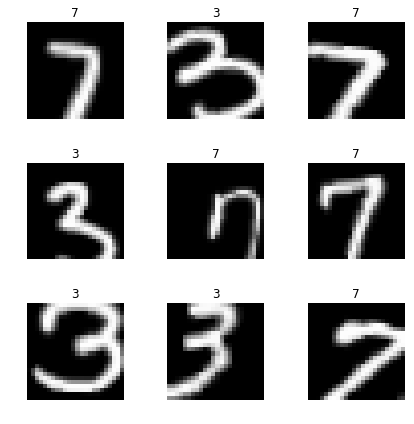

In [ ]:
data = ImageDataBunch.from_folder(untar_data(URLs.MNIST_SAMPLE),
                                  ds_tfms=tfms, size=24)
data.normalize()
data.show_batch(rows=3, figsize=(6,6))

## Datasets

Depending on the task you are tackling, you'll need one of the following fastai datasets.

In [ ]:
show_doc(ImageClassificationDataset, title_level=3)

<h3 id="ImageClassificationDataset"><code>class</code> <code>ImageClassificationDataset</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L84" class="source_link">[source]</a></h3>

> <code>ImageClassificationDataset</code>(`fns`:`FilePathList`, `labels`:`StrList`, `classes`:`Optional`\[`ArgStar`\]=`None`, `kwargs`) :: [`ImageClassificationBase`](/vision.data.html#ImageClassificationBase)

[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) for folders of images in style {folder}/{class}/{images}.  

This is the basic dataset for image classification: `fns` are the filenames of the images and `labels` the corresponding labels. Optionally, `classes` contains a name for each possible label.

In [ ]:
show_doc(ImageClassificationDataset.from_folder)

<h4 id="ImageClassificationDataset.from_folder"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L104" class="source_link">[source]</a></h4>

> <code>from_folder</code>(`folder`:`Path`, `classes`:`Optional`\[`ArgStar`\]=`None`, `valid_pct`:`float`=`0.0`, `extensions`:`StrList`=`{'.bmp', '.ppm', '.svg', '.ras', '.jpe', '.rgb', '.xbm', '.pbm', '.pgm', '.tiff', '.jpg', '.ico', '.xpm', '.pnm', '.tif', '.xwd', '.jpeg', '.gif', '.png', '.ief'}`) → `Union`\[`ImageClassificationDataset`, `List`\[`ImageClassificationDataset`\]\]

Dataset of `classes` labeled images in `folder`. Optional `valid_pct` split validation set.  

Create an [`ImageClassificationDataset`](/vision.data.html#ImageClassificationDataset) automatically from a `folder`. If `classes` is None, it will be set to the names of the directories in `folder`. `check_ext` forces the function to only keep filenames with image extensions.

In [ ]:
show_doc(ImageClassificationDataset.from_single_folder, doc_string=False)

<h4 id="ImageClassificationDataset.from_single_folder"><code>from_single_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L98" class="source_link">[source]</a></h4>

> <code>from_single_folder</code>(`folder`:`PathOrStr`, `classes`:`ArgStar`, `extensions`:`StrList`=`{'.bmp', '.ppm', '.svg', '.ras', '.jpe', '.rgb', '.xbm', '.pbm', '.pgm', '.tiff', '.jpg', '.ico', '.xpm', '.pnm', '.tif', '.xwd', '.jpeg', '.gif', '.png', '.ief'}`)

Typically used for define a test set. Label all images in `folder` with `classes[0]`. `check_ext` forces the function to only keep filenems with image extensions.

In [ ]:
show_doc(ImageMultiDataset, doc_string=False, title_level=3)

<h3 id="ImageMultiDataset"><code>class</code> <code>ImageMultiDataset</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L120" class="source_link">[source]</a></h3>

> <code>ImageMultiDataset</code>(`fns`:`FilePathList`, `labels`:`StrList`, `classes`:`Optional`\[`ArgStar`\]=`None`, `kwargs`) :: [`ImageClassificationBase`](/vision.data.html#ImageClassificationBase)

This is the basic dataset for image classification with multiple labels: `fns` are the filenames of the images and `labels` the corresponding labels (may be more than one for each image). Optionally, `classes` contains a name for each possible label.

In [ ]:
show_doc(ImageMultiDataset.from_folder, doc_string=False)

<h4 id="ImageMultiDataset.from_folder"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L146" class="source_link">[source]</a></h4>

> <code>from_folder</code>(`path`:`PathOrStr`, `folder`:`PathOrStr`, `fns`:`Series`, `labels`:`StrList`, `valid_pct`:`float`=`0.2`, `classes`:`Optional`\[`ArgStar`\]=`None`)

To create an [`ImageMultiDataset`](/vision.data.html#ImageMultiDataset) automatically in `path` from a `folder` and `fns`. If `classes` is None, it will be set to the names of the different `labels` seen. You can split the images in this `folder` in a train/valid dataset if `valid_pct` is non-zero. `check_ext` forces the function to only keep filenems with image extensions.

In [ ]:
show_doc(ImageMultiDataset.from_single_folder, doc_string=False)

<h4 id="ImageMultiDataset.from_single_folder"><code>from_single_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L139" class="source_link">[source]</a></h4>

> <code>from_single_folder</code>(`folder`:`PathOrStr`, `classes`:`ArgStar`, `extensions`=`{'.bmp', '.ppm', '.svg', '.ras', '.jpe', '.rgb', '.xbm', '.pbm', '.pgm', '.tiff', '.jpg', '.ico', '.xpm', '.pnm', '.tif', '.xwd', '.jpeg', '.gif', '.png', '.ief'}`)

Typically used for define a test set. Label all images in `folder` with `classes[0]`. `check_ext` forces the function to only keep filenems with image extensions.

To help scan a folder for these [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), we use the following helper function:

In [ ]:
show_doc(get_image_files, doc_string=False)

<h4 id="get_image_files"><code>get_image_files</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L20" class="source_link">[source]</a></h4>

> <code>get_image_files</code>(`c`:`PathOrStr`, `check_ext`:`bool`=`True`, `recurse`=`False`) → `FilePathList`

Return list of files in `c` that are images. `check_ext` will filter to keep only the files with image extensions.

In [ ]:
show_doc(ImageMultiDataset.get_labels)

<h4 id="ImageMultiDataset.get_labels"><code>get_labels</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L136" class="source_link">[source]</a></h4>

> <code>get_labels</code>(`idx`:`int`) → `StrList`

Gets the labels of a batch of images of choice. Pass in the batch number/index and will return the labels for each of the examples in that batch.

In [ ]:
show_doc(ImageMultiDataset.encode)

<h4 id="ImageMultiDataset.encode"><code>encode</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L130" class="source_link">[source]</a></h4>

> <code>encode</code>(`x`:`Collection`\[`int`\])

One-hot encode the target.  

In [ ]:
show_doc(SegmentationDataset, doc_string=False, title_level=3)

<h3 id="SegmentationDataset"><code>class</code> <code>SegmentationDataset</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L155" class="source_link">[source]</a></h3>

> <code>SegmentationDataset</code>(`x`:`FilePathList`, `y`:`FilePathList`, `classes`:`ArgStar`, `div`=`True`) :: [`ImageClassificationBase`](/vision.data.html#ImageClassificationBase)

This is the basic dataset for image sementation: `x` contains the filenames of the images and `y` the ones of the masks.

In [ ]:
show_doc(PointsDataset, title_level=3, doc_string=False)

<h3 id="PointsDataset"><code>class</code> <code>PointsDataset</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L167" class="source_link">[source]</a></h3>

> <code>PointsDataset</code>(`fns`:`FilePathList`, `pts`:`Collection`\[`Tensor`\]) :: [`ImageDatasetBase`](/vision.data.html#ImageDatasetBase)

Basic dataset for points targets. `fns` contains the filenames of the images and `pts` the target points.

In [ ]:
show_doc(ObjectDetectDataset, doc_string=False, title_level=3)

<h3 id="ObjectDetectDataset"><code>class</code> <code>ObjectDetectDataset</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L173" class="source_link">[source]</a></h3>

> <code>ObjectDetectDataset</code>(`x_fns`:`FilePathList`, `labelled_bbs`:`Collection`\[`Tuple`\[`Collection`\[`int`\], `str`\]\], `classes`:`StrList`=`None`) :: [`ImageClassificationBase`](/vision.data.html#ImageClassificationBase)

This is the basic dataset for object detection: `x_fns` contains the filenames of the images, `labelled_bbs` the corresponding bounding boxes with their corresponding labels. `classes` contains the list of classes.

In [ ]:
show_doc(ObjectDetectDataset.from_json)

<h4 id="ObjectDetectDataset.from_json"><code>from_json</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L189" class="source_link">[source]</a></h4>

> <code>from_json</code>(`folder`, `fname`, `valid_pct`=`None`, `classes`=`None`)

Create an [`ObjectDetectDataset`](/vision.data.html#ObjectDetectDataset) by looking at the images in `folder` according to annotations in the json `fname`. If `valid_pct` is passed, split a training and validation set. `classes` is the list of classes. 

This factory method uses the following helper function.

In [ ]:
show_doc(get_annotations)

<h4 id="get_annotations"><code>get_annotations</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L24" class="source_link">[source]</a></h4>

> <code>get_annotations</code>(`fname`, `prefix`=`None`)

Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes.  

To use this dataset and collate samples into batches, you'll need to following function:

In [ ]:
show_doc(bb_pad_collate)

<h4 id="bb_pad_collate"><code>bb_pad_collate</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L200" class="source_link">[source]</a></h4>

> <code>bb_pad_collate</code>(`samples`:`BatchSamples`, `pad_idx`:`int`=`0`) → `Tuple`\[`FloatTensor`, `Tuple`\[`LongTensor`, `LongTensor`\]\]

Function that collect `samples` of labelled bboxes and adds padding with `pad_idx`.  

Finally, to apply transformations to [`Image`](/vision.image.html#Image) in a [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), we use this last class.

In [ ]:
show_doc(DatasetTfm, doc_string=False, title_level=3)

<h3 id="DatasetTfm"><code>class</code> <code>DatasetTfm</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L224" class="source_link">[source]</a></h3>

> <code>DatasetTfm</code>(`ds`:[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), `tfms`:`Union`\[[`Transform`](/vision.image.html#Transform), `Collection`\[[`Transform`](/vision.image.html#Transform)\]\]=`None`, `tfm_y`:`bool`=`False`, `kwargs`:`Any`) :: [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)

Dataset that applies the list of transforms `tfms` to every item drawn. If `tfms` should be applied to the targets as well, `tfm_y` should be True. `kwargs` will be passed to [`apply_tfms`](/vision.image.html#apply_tfms) internally.

Then this last function automatizes the process of creating [`DatasetTfm`](/vision.data.html#DatasetTfm):

In [ ]:
show_doc(transform_datasets, doc_string=False)

<h4 id="transform_datasets"><code>transform_datasets</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L250" class="source_link">[source]</a></h4>

> <code>transform_datasets</code>(`train_ds`:[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), `valid_ds`:[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), `test_ds`:`Optional`\[[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)\]=`None`, `tfms`:`Optional`\[`Tuple`\[`Union`\[[`Transform`](/vision.image.html#Transform), `Collection`\[[`Transform`](/vision.image.html#Transform)\]\], `Union`\[[`Transform`](/vision.image.html#Transform), `Collection`\[[`Transform`](/vision.image.html#Transform)\]\]\]\]=`None`, `resize_method`:[`ResizeMethod`](/vision.image.html#ResizeMethod)=`None`, `kwargs`:`Any`)

Create train, valid and maybe test DatasetTfm from `train_ds`, `valid_ds` and maybe `test_ds` using `tfms`. It should be a tuple containing the transforms for the training set, then for the validation and test set.

In [ ]:
show_doc(ImageDatasetBase, doc_string=False, title_level=3)

<h3 id="ImageDatasetBase"><code>class</code> <code>ImageDatasetBase</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L67" class="source_link">[source]</a></h3>

> <code>ImageDatasetBase</code>(`kwargs`) :: [`DatasetBase`](/basic_data.html#DatasetBase)

Base class for computer vision datasets.

In [ ]:
show_doc(ImageClassificationBase, title_level=3, doc_string=False)

<h3 id="ImageClassificationBase"><code>class</code> <code>ImageClassificationBase</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L75" class="source_link">[source]</a></h3>

> <code>ImageClassificationBase</code>(`x`:`Collection`, `y`:`Collection`, `classes`:`Collection`=`None`, `kwargs`) :: [`ImageDatasetBase`](/vision.data.html#ImageDatasetBase)

Base class for classification tasks. `x` contains the input filenames, `y` the targets and `classes` the possible tags.

In [ ]:
show_doc(ImageClassificationBase.new)

<h4 id="ImageClassificationBase.new"><code>new</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L80" class="source_link">[source]</a></h4>

> <code>new</code>(`args`, `classes`:`Optional`\[`ArgStar`\]=`None`, `kwargs`)

Create a new dataset using `self` as a template  

## Links with the data block API

The vision application adds a few methods to implement data augmentation in the data block API or create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch).

In [ ]:
show_doc(ImageSplitDatasets, title_level=3)

<h3 id="ImageSplitDatasets"><code>class</code> <code>ImageSplitDatasets</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L51" class="source_link">[source]</a></h3>

> <code>ImageSplitDatasets</code>(`path`:`PathOrStr`, `train_ds`:[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), `valid_ds`:[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), `test_ds`:`Optional`\[[`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)\]=`None`) :: [`SplitDatasets`](/data_block.html#SplitDatasets)

A class regrouping `train_ds`, a `valid_ds` and maybe a `train_ds` dataset, inside a `path`.  

In [ ]:
show_doc(ImageSplitDatasets.transform)

<h4 id="ImageSplitDatasets.transform"><code>transform</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L52" class="source_link">[source]</a></h4>

> <code>transform</code>(`tfms`:`Union`\[[`Transform`](/vision.image.html#Transform), `Collection`\[[`Transform`](/vision.image.html#Transform)\]\], `kwargs`) → `SplitDatasets`

Apply `tfms` to the underlying datasets, `kwargs` are passed to [`DatasetTfm`](/vision.data.html#DatasetTfm).  

In [ ]:
show_doc(ImageSplitDatasets.databunch)

<h4 id="ImageSplitDatasets.databunch"><code>databunch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L62" class="source_link">[source]</a></h4>

> <code>databunch</code>(`path`:`PathOrStr`=`None`, `kwargs`) → `ImageDataBunch`

Create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from self, `path` will override `self.path`, `kwargs` are passed to [`ImageDataBunch.create`](/vision.data.html#ImageDataBunch.create).  

To change the default `extensions` in [`InputList.from_folder`](/data_block.html#InputList.from_folder) to image extensions, we subclass it to the following:

In [ ]:
show_doc(ImageFileList, title_level=3, doc_string=False)

<h3 id="ImageFileList"><code>class</code> <code>ImageFileList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L466" class="source_link">[source]</a></h3>

> <code>ImageFileList</code>(`items`:`Iterator`, `path`:`PathOrStr`=`'.'`) :: [`InputList`](/data_block.html#InputList)

In [ ]:
show_doc(ImageFileList.from_folder)

<h4 id="ImageFileList.from_folder"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L472" class="source_link">[source]</a></h4>

> <code>from_folder</code>(`path`:`PathOrStr`=`'.'`, `extensions`:`StrList`=`{'.bmp', '.ppm', '.svg', '.ras', '.jpe', '.rgb', '.xbm', '.pbm', '.pgm', '.tiff', '.jpg', '.ico', '.xpm', '.pnm', '.tif', '.xwd', '.jpeg', '.gif', '.png', '.ief'}`, `recurse`=`True`) → `ImageFileList`

Get the list of files in `path` that have a suffix in `extensions`. `recurse` determines if we search subfolders.  

## Building your own dataset

This module also contains a few helper functions to allow you to build you own dataset for image classification.

In [ ]:
show_doc(download_images)

<h4 id="download_images"><code>download_images</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L404" class="source_link">[source]</a></h4>

> <code>download_images</code>(`urls`:`StrList`, `dest`:`PathOrStr`, `max_pics`:`int`=`1000`, `max_workers`:`int`=`8`, `timeout`=`4`)

Download images listed in text file `urls` to path `dest`, at most `max_pics`  

In [ ]:
show_doc(verify_images)

<h4 id="verify_images"><code>verify_images</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L447" class="source_link">[source]</a></h4>

> <code>verify_images</code>(`path`:`PathOrStr`, `delete`:`bool`=`True`, `max_workers`:`int`=`4`, `max_size`:`Union`\[`int`, `Tuple`\[`int`, `int`\]\]=`None`, `dest`:`PathOrStr`=`'.'`, `n_channels`:`int`=`3`, `interp`=`2`, `ext`:`str`=`None`, `img_format`:`str`=`None`, `resume`:`bool`=`None`, `kwargs`)

Check if the image in `path` exists, can be opened and has `n_channels`. If `n_channels` is 3 – it'll try to convert image to RGB. If `delete`, removes it if it fails.
If `resume` – it will skip already existent images in `dest`.  If `max_size` is specifided,
image is resized to the same ratio so that both sizes are less than `max_size`, using `interp`.
Result is stored in `dest`, `ext` forces an extension type, `img_format` and `kwargs` are
passed to PIL.Image.save. Use `max_workers` CPUs. 

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(PointsDataset.reconstruct_output)

<h4 id="PointsDataset.reconstruct_output"><code>reconstruct_output</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L171" class="source_link">[source]</a></h4>

> <code>reconstruct_output</code>(`out`, `x`)

In [ ]:
show_doc(SegmentationDataset.reconstruct_output)

<h4 id="SegmentationDataset.reconstruct_output"><code>reconstruct_output</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L165" class="source_link">[source]</a></h4>

> <code>reconstruct_output</code>(`out`, `x`)

In [ ]:
show_doc(ImageMultiDataset.encode_y)

<h4 id="ImageMultiDataset.encode_y"><code>encode_y</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L127" class="source_link">[source]</a></h4>

> <code>encode_y</code>()

## New Methods - Please document or move to the undocumented section